## This script reads CESM2 Discharge data downloaded from Casper in NCAR (Fig S1)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import xarray as xr
import seaborn as sns
import warnings
from matplotlib import pyplot as plt 


## for USGS

In [2]:
from dataretrieval import nwis
from IPython.display import display

## Read Lat, Lon data for the selected Domain processed from "GLADE" in Casper

### Lat

In [3]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/latsUsArr.npy'
#file_LatUs = 'https://github.com/rezaulg/CESM2-projection-Mississippi-discharge/blob/main/latsUsArr.npy'

lats_US = np.load(file_LatUs)
print(lats_US.shape)
print(lats_US)

(60,)
[24.75 25.25 25.75 26.25 26.75 27.25 27.75 28.25 28.75 29.25 29.75 30.25
 30.75 31.25 31.75 32.25 32.75 33.25 33.75 34.25 34.75 35.25 35.75 36.25
 36.75 37.25 37.75 38.25 38.75 39.25 39.75 40.25 40.75 41.25 41.75 42.25
 42.75 43.25 43.75 44.25 44.75 45.25 45.75 46.25 46.75 47.25 47.75 48.25
 48.75 49.25 49.75 50.25 50.75 51.25 51.75 52.25 52.75 53.25 53.75 54.25]


### Lon

In [4]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/lonsUsArr.npy'
lons_US = np.load(file_LonUs)
print(lons_US.shape)
print(lons_US)

(140,)
[-130.25 -129.75 -129.25 -128.75 -128.25 -127.75 -127.25 -126.75 -126.25
 -125.75 -125.25 -124.75 -124.25 -123.75 -123.25 -122.75 -122.25 -121.75
 -121.25 -120.75 -120.25 -119.75 -119.25 -118.75 -118.25 -117.75 -117.25
 -116.75 -116.25 -115.75 -115.25 -114.75 -114.25 -113.75 -113.25 -112.75
 -112.25 -111.75 -111.25 -110.75 -110.25 -109.75 -109.25 -108.75 -108.25
 -107.75 -107.25 -106.75 -106.25 -105.75 -105.25 -104.75 -104.25 -103.75
 -103.25 -102.75 -102.25 -101.75 -101.25 -100.75 -100.25  -99.75  -99.25
  -98.75  -98.25  -97.75  -97.25  -96.75  -96.25  -95.75  -95.25  -94.75
  -94.25  -93.75  -93.25  -92.75  -92.25  -91.75  -91.25  -90.75  -90.25
  -89.75  -89.25  -88.75  -88.25  -87.75  -87.25  -86.75  -86.25  -85.75
  -85.25  -84.75  -84.25  -83.75  -83.25  -82.75  -82.25  -81.75  -81.25
  -80.75  -80.25  -79.75  -79.25  -78.75  -78.25  -77.75  -77.25  -76.75
  -76.25  -75.75  -75.25  -74.75  -74.25  -73.75  -73.25  -72.75  -72.25
  -71.75  -71.25  -70.75  -70.25  -69.75  -6

## Using Monthly Data (Historical + Scen) for the US domain prepared from "GLADE" 

In [5]:
file_histSel_Us_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsHistSelEnsMean.npy'
file_histSel_Us_ensMean_loaded = np.load(file_histSel_Us_ensMean)
print(file_histSel_Us_ensMean_loaded.shape)
maxVal = np.nanmax(file_histSel_Us_ensMean_loaded)
maxVal

(1020, 60, 140)


1.0000000000000002e+36

In [6]:
file_scen_Us_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsScenEnsMean.npy'
file_scen_Us_ensMean_loaded = np.load(file_scen_Us_ensMean)
print(file_scen_Us_ensMean_loaded.shape)
maxVal = np.nanmax(file_scen_Us_ensMean_loaded)
maxVal

(1032, 60, 140)


1.0000000000000002e+36

## Concatenate the historical and scenario data arrays

In [7]:
disch_histSel_scen_Us_ensMean = np.concatenate((file_histSel_Us_ensMean_loaded, file_scen_Us_ensMean_loaded), axis=0)
print(disch_histSel_scen_Us_ensMean.shape)

(2052, 60, 140)


## The four time (1971-2000, 2015-2044, 2045-2074, and 2075-2100) slots

In [8]:
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000

scenYrSt = 2015
scenEraTwoYrSt = 2045
scenEraThreeYrSt = 2075

scenYrEnd = 2100

In [9]:
nYrsHistSelScen = scenYrEnd - histYrSelSt + 1
print(nYrsHistSelScen)

nMonsPerYr = 12     
print(nMonsPerYr)

171
12


### Coordinates at the outlet of the basins

In [10]:
# Missouri at Hermann
latTrgt_MissouriHermann = 38.71
lonTrgt_MissouriHermann = -91.44

# Arkansas at Murray Dam near Little Rock
latTrgt_ArkansasMurrayLittleRock = 34.79
lonTrgt_ArkansasMurrayLittleRock = -92.36

# Ohio at Olmsted
latTrgt_OhioOlmsted = 37.18
lonTrgt_OhioOlmsted = -89.06

# Mississippi at Vicksburg
latTrgt_MissiVicks = 32.32
lonTrgt_MissiVicks = -90.91


In [11]:
# Missouri at Hermann
latTrgtIndex_MissouriHermann = np.argmin( np.abs(lats_US - latTrgt_MissouriHermann))
lonTrgtIndex_MissouriHermann = np.argmin( np.abs(lons_US - lonTrgt_MissouriHermann))
print(latTrgtIndex_MissouriHermann, lonTrgtIndex_MissouriHermann)

# Arkansas at Murray Dam near Little Rock
latTrgtIndex_ArkansasMurrayLittleRock = np.argmin( np.abs(lats_US - latTrgt_ArkansasMurrayLittleRock))
lonTrgtIndex_ArkansasMurrayLittleRock = np.argmin( np.abs(lons_US - lonTrgt_ArkansasMurrayLittleRock))
print(latTrgtIndex_ArkansasMurrayLittleRock, lonTrgtIndex_ArkansasMurrayLittleRock)

# Ohio at Olmsted
latTrgtIndex_OhioOlmsted = np.argmin( np.abs(lats_US - latTrgt_OhioOlmsted))
lonTrgtIndex_OhioOlmsted = np.argmin( np.abs(lons_US - lonTrgt_OhioOlmsted))
print(latTrgtIndex_OhioOlmsted, lonTrgtIndex_OhioOlmsted)

# Mississippi at Vicksburg
latTrgtIndex_MissiVicks = np.argmin( np.abs(lats_US - latTrgt_MissiVicks))
lonTrgtIndex_MissiVicks = np.argmin( np.abs(lons_US - lonTrgt_MissiVicks))
print(latTrgtIndex_MissiVicks, lonTrgtIndex_MissiVicks)


28 78
20 76
25 82
15 79


In [12]:
print(disch_histSel_scen_Us_ensMean.shape)

(2052, 60, 140)


## Extracting discharge values at different outlet points

### Missouri at Hermann

In [13]:
disch_histSel_scen_ensMean_MissouriHermann = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_MissouriHermann, lonTrgtIndex_MissouriHermann]
print(disch_histSel_scen_ensMean_MissouriHermann.shape)

#disch_histSel_scen_ensMean_MissouriHermann = np.nanmean(disch_histSel_scen_ensMems_MissouriHermann, axis =1)
#print(disch_histSel_scen_ensMean_MissouriHermann.shape)

disch_histSel_scen_ensMean_Yr_MissouriHermann = np.reshape(disch_histSel_scen_ensMean_MissouriHermann,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_MissouriHermann.shape)


(2052,)
(171, 12)


### Arkansas at Murray Dam near Little Rock

In [14]:
disch_histSel_scen_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_ArkansasMurrayLittleRock, lonTrgtIndex_ArkansasMurrayLittleRock]
print(disch_histSel_scen_ensMean_ArkansasMurrayLittleRock.shape)

disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock = np.reshape(disch_histSel_scen_ensMean_ArkansasMurrayLittleRock,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock.shape)

(2052,)
(171, 12)


### Ohio River at Olmsted

In [15]:
disch_histSel_scen_ensMean_OhioOlmsted = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_OhioOlmsted, lonTrgtIndex_OhioOlmsted]
print(disch_histSel_scen_ensMean_OhioOlmsted.shape)

disch_histSel_scen_ensMean_Yr_OhioOlmsted = np.reshape(disch_histSel_scen_ensMean_OhioOlmsted,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_OhioOlmsted.shape)

(2052,)
(171, 12)


### Mississippi at Vicksburg

In [16]:
disch_histSel_scen_ensMean_MissiVicks = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_MissiVicks, lonTrgtIndex_MissiVicks]
print(disch_histSel_scen_ensMean_MissiVicks.shape)

disch_histSel_scen_ensMean_Yr_MissiVicks=np.reshape(disch_histSel_scen_ensMean_MissiVicks,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_MissiVicks.shape)

(2052,)
(171, 12)


## Retrieve USGS data for different stations

In [17]:
parameterCode = "00060" # Discharge

## Arkansas at Murray Dam near Little Rock

In [18]:

usgsGage_ArkansasMurrayLittleRock = '07263450'   # Arkansas at Murray Dam near Little Rock
startDate_ArkansasMurrayLittleRock = "2017-1-1"
endDate_ArkansasMurrayLittleRock = "2022-9-30"
yrGageSt_ArkansasMurrayLittleRock =  2017
yrGageEnd_ArkansasMurrayLittleRock = 2022
nYrsGage_ArkansasMurrayLittleRock = yrGageEnd_ArkansasMurrayLittleRock - yrGageSt_ArkansasMurrayLittleRock + 1
print(nYrsGage_ArkansasMurrayLittleRock)

# Retrieve the data
flowDaily_toRetrieve_ArkansasMurrayLittleRock = nwis.get_dv(sites= usgsGage_ArkansasMurrayLittleRock, parameterCd= parameterCode, start= startDate_ArkansasMurrayLittleRock, end= endDate_ArkansasMurrayLittleRock) 
print("Retrieved " + str(len(flowDaily_toRetrieve_ArkansasMurrayLittleRock[0])) + " data values.")

flowDaily_ArkansasMurrayLittleRock = flowDaily_toRetrieve_ArkansasMurrayLittleRock[0].to_numpy()
print(flowDaily_ArkansasMurrayLittleRock.shape)

flowDaily_cumec_ArkansasMurrayLittleRock = (flowDaily_ArkansasMurrayLittleRock[:, 0])/(3.281**3)
print(flowDaily_cumec_ArkansasMurrayLittleRock.shape)

flowDaily_cumec_float_ArkansasMurrayLittleRock = pd.to_numeric(flowDaily_cumec_ArkansasMurrayLittleRock, downcast="float")
print(flowDaily_cumec_float_ArkansasMurrayLittleRock.shape)
print(flowDaily_cumec_float_ArkansasMurrayLittleRock[0:31])


6
Retrieved 2099 data values.
(2099, 7)
(2099,)
(2099,)
[  0.      396.3778  239.52545 387.884   342.58368 339.7524  336.92114
 135.90097 486.97845 258.77808 197.62265 229.89914 736.13025 430.35306
 300.11462 107.87139 855.0436  906.0065  787.0931  973.9569  877.6937
 673.8423  608.7231  611.5543  939.9817  942.8129  937.1504  985.282
 922.9941  738.9615  676.6736 ]


In [19]:
datesUsgsGageSt_ArkansasMurrayLittleRock = pd.Series(pd.date_range(str(yrGageSt_ArkansasMurrayLittleRock) + "-01-01", str(yrGageEnd_ArkansasMurrayLittleRock) + "-9-30", freq="D"))
usgsGageShape_ArkansasMurrayLittleRock = datesUsgsGageSt_ArkansasMurrayLittleRock.shape[0]
print(usgsGageShape_ArkansasMurrayLittleRock)

missingGageData_ArkansasMurrayLittleRock = usgsGageShape_ArkansasMurrayLittleRock - len(flowDaily_toRetrieve_ArkansasMurrayLittleRock[0])
print(missingGageData_ArkansasMurrayLittleRock)

dfUsgsDisch_ArkansasMurrayLittleRock = pd.DataFrame(np.zeros((usgsGageShape_ArkansasMurrayLittleRock-missingGageData_ArkansasMurrayLittleRock, 3)), columns=['Day_step', 'Date','Discharge'])
dfUsgsDisch_ArkansasMurrayLittleRock.Day_step = np.arange(usgsGageShape_ArkansasMurrayLittleRock-missingGageData_ArkansasMurrayLittleRock)
dfUsgsDisch_ArkansasMurrayLittleRock.Date = datesUsgsGageSt_ArkansasMurrayLittleRock
dfUsgsDisch_ArkansasMurrayLittleRock.Discharge = flowDaily_cumec_float_ArkansasMurrayLittleRock

dfUsgsDisch_ArkansasMurrayLittleRock


2099
0


,Day_step,Date,Discharge
0,0,2017-01-01,0.000000
1,1,2017-01-02,396.377808
2,2,2017-01-03,239.525452
3,3,2017-01-04,387.884003
4,4,2017-01-05,342.583679
...,...,...,...
2094,2094,2022-09-26,137.033478
2095,2095,2022-09-27,220.839066
2096,2096,2022-09-28,174.689362
2097,2097,2022-09-29,89.751266


In [20]:
dfUsgsDischMon_ArkansasMurrayLittleRock = dfUsgsDisch_ArkansasMurrayLittleRock.groupby(pd.PeriodIndex(dfUsgsDisch_ArkansasMurrayLittleRock['Date'], freq="M"))['Discharge'].mean().reset_index()
dfUsgsDischMon_ArkansasMurrayLittleRock

,Date,Discharge
0,2017-01,560.143982
1,2017-02,629.532898
2,2017-03,846.348816
3,2017-04,2651.673340
4,2017-05,5271.642090
...,...,...
64,2022-05,4581.086426
65,2022-06,3651.394775
66,2022-07,900.709229
67,2022-08,678.582397


In [21]:
dfUsgsDischMon_Squeeze_ArkansasMurrayLittleRock = np.squeeze(dfUsgsDischMon_ArkansasMurrayLittleRock.Discharge)
print(dfUsgsDischMon_Squeeze_ArkansasMurrayLittleRock.shape)

(69,)


In [22]:
dischObsMonClim_ArkansasMurrayLittleRock = np.zeros((nMonsPerYr))
dischObsMonClim_ArkansasMurrayLittleRock[:] = np.nan
print(dischObsMonClim_ArkansasMurrayLittleRock.shape)

(12,)


In [23]:
for gageMon in range(nMonsPerYr):
    dischObsMonClim_ArkansasMurrayLittleRock[gageMon] =  np.nanmean(dfUsgsDischMon_Squeeze_ArkansasMurrayLittleRock[gageMon::nMonsPerYr])
    
print(dischObsMonClim_ArkansasMurrayLittleRock.shape)
print(dischObsMonClim_ArkansasMurrayLittleRock)  

(12,)
[1829.20068359 1844.02404785 2353.0715332  2727.8972168  4263.34472656
 3508.70507812 1736.14099121 1183.9901123   826.93847656 1290.08154297
 1222.07995605 1078.56958008]


## Missouri at Hermann

In [24]:

usgsGage_MissouriHermann = '06934500'   # Missouri at Hermann
startDate_MissouriHermann = "1929-1-1"
endDate_MissouriHermann = "2022-9-30"
yrGageSt_MissouriHermann =  1929
yrGageEnd_MissouriHermann = 2022
nYrsGage_MissouriHermann = yrGageEnd_MissouriHermann - yrGageSt_MissouriHermann + 1
print(nYrsGage_MissouriHermann)

# Retrieve the data
flowDaily_toRetrieve_MissouriHermann = nwis.get_dv(sites= usgsGage_MissouriHermann, parameterCd= parameterCode, start= startDate_MissouriHermann, end= endDate_MissouriHermann) 
print("Retrieved " + str(len(flowDaily_toRetrieve_MissouriHermann[0])) + " data values.")

flowDaily_MissouriHermann = flowDaily_toRetrieve_MissouriHermann[0].to_numpy()
print(flowDaily_MissouriHermann.shape)

flowDaily_cumec_MissouriHermann = (flowDaily_MissouriHermann[:, 0])/(3.281**3)
print(flowDaily_cumec_MissouriHermann.shape)

flowDaily_cumec_float_MissouriHermann = pd.to_numeric(flowDaily_cumec_MissouriHermann, downcast="float")
print(flowDaily_cumec_float_MissouriHermann.shape)
print(flowDaily_cumec_float_MissouriHermann[0:31])


94
Retrieved 34241 data values.
(34241, 3)
(34241,)
(34241,)
[1254.2527  1180.6396  1112.6892   979.61945  917.33154  917.33154
  956.9693  1022.0885  1090.0391  1157.9895  1279.7341  1483.5856
 1613.824   1812.013   1727.0748  1585.5112  1534.5485  1483.5856
 1381.6598  1330.697   1279.7341  1254.2527  1228.7712  1206.1211
 1180.6396  1157.9895  1135.3394  1112.6892  1090.0391  1067.3888
 1044.7386 ]


In [25]:
datesUsgsGageSt_MissouriHermann = pd.Series(pd.date_range(str(yrGageSt_MissouriHermann) + "-01-01", str(yrGageEnd_MissouriHermann) + "-9-30", freq="D"))
usgsGageShape_MissouriHermann = datesUsgsGageSt_MissouriHermann.shape[0]
print(usgsGageShape_MissouriHermann)

missingGageData_MissouriHermann = usgsGageShape_MissouriHermann - len(flowDaily_toRetrieve_MissouriHermann[0])
print(missingGageData_MissouriHermann)

dfUsgsDisch_MissouriHermann = pd.DataFrame(np.zeros((usgsGageShape_MissouriHermann-missingGageData_MissouriHermann, 3)), columns=['Day_step', 'Date','Discharge'])
dfUsgsDisch_MissouriHermann.Day_step = np.arange(usgsGageShape_MissouriHermann-missingGageData_MissouriHermann)
dfUsgsDisch_MissouriHermann.Date = datesUsgsGageSt_MissouriHermann
dfUsgsDisch_MissouriHermann.Discharge = flowDaily_cumec_float_MissouriHermann

dfUsgsDisch_MissouriHermann


34241
0


,Day_step,Date,Discharge
0,0,1929-01-01,1254.252686
1,1,1929-01-02,1180.639648
2,2,1929-01-03,1112.689209
3,3,1929-01-04,979.619446
4,4,1929-01-05,917.331543
...,...,...,...
34236,34236,2022-09-26,1135.339355
34237,34237,2022-09-27,1132.508057
34238,34238,2022-09-28,1126.845459
34239,34239,2022-09-29,1126.845459


In [26]:
dfUsgsDischMon_MissouriHermann = dfUsgsDisch_MissouriHermann.groupby(pd.PeriodIndex(dfUsgsDisch_MissouriHermann['Date'], freq="M"))['Discharge'].mean().reset_index()
dfUsgsDischMon_MissouriHermann

,Date,Discharge
0,1929-01,1244.480225
1,1929-02,1042.210815
2,1929-03,4398.515137
3,1929-04,6418.489258
4,1929-05,6418.763184
...,...,...
1120,2022-05,3984.784424
1121,2022-06,3470.287842
1122,2022-07,1753.378174
1123,2022-08,1348.049927


In [27]:
dfUsgsDischMon_Squeeze_MissouriHermann = np.squeeze(dfUsgsDischMon_MissouriHermann.Discharge)
print(dfUsgsDischMon_Squeeze_MissouriHermann.shape)

(1125,)


In [28]:
dischObsMonClim_MissouriHermann = np.zeros((nMonsPerYr))
dischObsMonClim_MissouriHermann[:] = np.nan
print(dischObsMonClim_MissouriHermann.shape)

(12,)


In [29]:
for gageMon in range(nMonsPerYr):
    dischObsMonClim_MissouriHermann[gageMon] =  np.nanmean(dfUsgsDischMon_Squeeze_MissouriHermann[gageMon::nMonsPerYr])
    
print(dischObsMonClim_MissouriHermann.shape)
print(dischObsMonClim_MissouriHermann)  

(12,)
[1392.42883301 1749.33813477 2585.2644043  3264.80078125 3441.96386719
 3714.66650391 2942.82641602 2021.93322754 1987.68139648 1980.22937012
 1894.86279297 1532.3807373 ]


## Ohio at Olmsted

In [30]:

usgsGage_OhioOlmsted = '03612600'   # Ohio at Olmsted
startDate_OhioOlmsted = "2014-1-1"
endDate_OhioOlmsted = "2021-12-31"  # Many missing data after 04/02/2022
yrGageSt_OhioOlmsted =  2014
yrGageEnd_OhioOlmsted = 2021

nYrsGage_OhioOlmsted = yrGageEnd_OhioOlmsted - yrGageSt_OhioOlmsted + 1
print(nYrsGage_OhioOlmsted)

# Retrieve the data
flowDaily_toRetrieve_OhioOlmsted = nwis.get_dv(sites= usgsGage_OhioOlmsted, parameterCd= parameterCode, start= startDate_OhioOlmsted, end= endDate_OhioOlmsted) 
print("Retrieved " + str(len(flowDaily_toRetrieve_OhioOlmsted[0])) + " data values.")

flowDaily_OhioOlmsted = flowDaily_toRetrieve_OhioOlmsted[0].to_numpy()
print(flowDaily_OhioOlmsted.shape)

flowDaily_cumec_OhioOlmsted = (flowDaily_OhioOlmsted[:, 0])/(3.281**3)
print(flowDaily_cumec_OhioOlmsted.shape)

flowDaily_cumec_float_OhioOlmsted = pd.to_numeric(flowDaily_cumec_OhioOlmsted, downcast="float")
print(flowDaily_cumec_float_OhioOlmsted.shape)
print(flowDaily_cumec_float_OhioOlmsted[0:31])


8
Retrieved 2922 data values.
(2922, 3)
(2922,)
(2922,)
[21092.963  20526.709  20102.018  19620.701  19365.889  18743.008
 17299.06   15571.985  13873.224  11863.021  11353.394  11608.208
 12287.713  12712.403  13873.224  15487.048  17327.373  18120.129
 18516.506  18544.82   18205.066  16987.621  13986.475  10815.452
  9314.879   8408.872   7672.742   6568.547   5407.726   5464.3516
  6087.231 ]


In [31]:
datesUsgsGageSt_OhioOlmsted = pd.Series(pd.date_range(str(yrGageSt_OhioOlmsted) + "-01-01", str(yrGageEnd_OhioOlmsted) + "-12-31", freq="D"))
usgsGageShape_OhioOlmsted = datesUsgsGageSt_OhioOlmsted.shape[0]
print(usgsGageShape_OhioOlmsted)

missingGageData_OhioOlmsted = usgsGageShape_OhioOlmsted - len(flowDaily_toRetrieve_OhioOlmsted[0])
print(missingGageData_OhioOlmsted)

dfUsgsDisch_OhioOlmsted = pd.DataFrame(np.zeros((usgsGageShape_OhioOlmsted-missingGageData_OhioOlmsted, 3)), columns=['Day_step', 'Date','Discharge'])
dfUsgsDisch_OhioOlmsted.Day_step = np.arange(usgsGageShape_OhioOlmsted-missingGageData_OhioOlmsted)
dfUsgsDisch_OhioOlmsted.Date = datesUsgsGageSt_OhioOlmsted
dfUsgsDisch_OhioOlmsted.Discharge = flowDaily_cumec_float_OhioOlmsted

dfUsgsDisch_OhioOlmsted


2922
0


,Day_step,Date,Discharge
0,0,2014-01-01,21092.962891
1,1,2014-01-02,20526.708984
2,2,2014-01-03,20102.017578
3,3,2014-01-04,19620.701172
4,4,2014-01-05,19365.888672
...,...,...,...
2917,2917,2021-12-27,6710.110352
2918,2918,2021-12-28,6879.986328
2919,2919,2021-12-29,7955.869141
2920,2920,2021-12-30,7955.869141


In [32]:
dfUsgsDischMon_OhioOlmsted = dfUsgsDisch_OhioOlmsted.groupby(pd.PeriodIndex(dfUsgsDisch_OhioOlmsted['Date'], freq="M"))['Discharge'].mean().reset_index()
dfUsgsDischMon_OhioOlmsted

,Date,Discharge
0,2014-01,14090.591797
1,2014-02,13529.426758
2,2014-03,11479.430664
3,2014-04,12942.679688
4,2014-05,11264.801758
...,...,...
91,2021-08,4653.786133
92,2021-09,6138.759766
93,2021-10,5224.149902
94,2021-11,4867.896973


In [33]:
dfUsgsDischMon_Squeeze_OhioOlmsted = np.squeeze(dfUsgsDischMon_OhioOlmsted.Discharge)
print(dfUsgsDischMon_Squeeze_OhioOlmsted.shape)

(96,)


In [34]:
dischObsMonClim_OhioOlmsted = np.zeros((nMonsPerYr))
dischObsMonClim_OhioOlmsted[:] = np.nan
print(dischObsMonClim_OhioOlmsted.shape)

(12,)


In [35]:
for gageMon in range(nMonsPerYr):
    dischObsMonClim_OhioOlmsted[gageMon] =  np.nanmean(dfUsgsDischMon_Squeeze_OhioOlmsted[gageMon::nMonsPerYr])
    
print(dischObsMonClim_OhioOlmsted.shape)
print(dischObsMonClim_OhioOlmsted)  

(12,)
[14077.12109375 15990.33007812 18373.00195312 15044.89746094
 10862.91015625  7305.59667969  6946.81835938  4279.12255859
  4255.05664062  4389.42773438  6908.11035156 10406.17382812]


## Mississippi at Vicksburg

In [36]:
yrGaugeVicksSt =  2008
yrGaugeVicksEnd = 2021
nYrsGaugeVicks = yrGaugeVicksEnd - yrGaugeVicksSt + 1
print(nYrsGaugeVicks)


14


In [37]:
timeGaugeVicksSt = "2008-1-1"
timeGaugeVicksEnd = "2021-12-31"

datesGaugeVicks = pd.Series(pd.date_range(timeGaugeVicksSt, timeGaugeVicksEnd, freq="D"))
nDaysGaugeVicks = datesGaugeVicks.shape[0]
print(nDaysGaugeVicks)

5114


In [38]:
dischGauge_VicksFile = pd.read_excel('C:/rezaul/1.academic/1.research/2.project/mrb/dt/param/disch/usgs/dnld/stn/Vicksburg.xlsx', sheet_name='Vicks-filled')
dischGauge_Vicks_cusec = dischGauge_VicksFile.Discharge
print(dischGauge_Vicks_cusec.shape)


(5114,)


In [39]:
dischGauge_Vicks = (dischGauge_Vicks_cusec)/(3.281**3)
print(dischGauge_Vicks.shape)

(5114,)


## Feeding into a pandas dataframe

In [40]:
dfUsgsDisch_Vicks = pd.DataFrame(np.zeros((nDaysGaugeVicks, 3)), columns=['Sl', 'time','flow'])
dfUsgsDisch_Vicks.Sl = np.arange(nDaysGaugeVicks)
dfUsgsDisch_Vicks.time = datesGaugeVicks
dfUsgsDisch_Vicks.flow = dischGauge_Vicks

dfUsgsDisch_Vicks


,Sl,time,flow
0,0,2008-01-01,21347.776863
1,1,2008-01-02,20243.581508
2,2,2008-01-03,19309.262362
3,3,2008-01-04,18431.568618
4,4,2008-01-05,17638.812979
...,...,...,...
5109,5109,2021-12-27,16534.617624
5110,5110,2021-12-28,16194.865207
5111,5111,2021-12-29,15826.800088
5112,5112,2021-12-30,15628.611178


In [41]:
dfUsgsDischMon_Vicks = dfUsgsDisch_Vicks.groupby(pd.PeriodIndex(dfUsgsDisch_Vicks['time'], freq="M"))['flow'].mean().reset_index()
dfUsgsDischMon_Vicks

,time,flow
0,2008-01,17268.007921
1,2008-02,23222.272957
2,2008-03,33505.798837
3,2008-04,49009.286141
4,2008-05,34459.297555
...,...,...
163,2021-08,12991.876696
164,2021-09,11852.640567
165,2021-10,10551.504497
166,2021-11,12637.846153


In [42]:
print(dfUsgsDischMon_Vicks.flow.shape)

(168,)


In [43]:
usgsDischMon_Vicks = np.squeeze(dfUsgsDischMon_Vicks.flow)
print(usgsDischMon_Vicks.shape)

(168,)


In [44]:
dischObsMonClim_MissiVicks = np.zeros((nMonsPerYr))
dischObsMonClim_MissiVicks[:] = np.nan
print(dischObsMonClim_MissiVicks.shape)


(12,)


In [45]:
for gageMon in range(nMonsPerYr):    
    dischObsMonClim_MissiVicks[gageMon] =  np.nanmean(usgsDischMon_Vicks[gageMon::nMonsPerYr])
   
print(dischObsMonClim_MissiVicks.shape)
print(dischObsMonClim_MissiVicks)  

(12,)
[22835.62889342 23115.24357329 30434.84928322 31271.3787076
 32741.4211352  26293.73615491 21955.65186733 14635.64429328
 12195.96577723 12644.05668087 14269.46668837 17691.39370977]


## Group plot for the Relative Discharges (the Z-score)

## Reference Period

In [46]:
refPeriodStepSt = refPeriodYrSt - histYrSelSt
refPeriodStepEnd = refPeriodYrEnd - histYrSelSt + 1

print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

41 71
30


## Era1

In [47]:
scenEraOneStepSt = scenYrSt - histYrSelSt
scenEraOneStepEnd = scenEraTwoYrSt - histYrSelSt

print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

85 115
30


## Era2

In [48]:
scenEraTwoStepSt = scenEraTwoYrSt - histYrSelSt
scenEraTwoStepEnd = scenEraThreeYrSt - histYrSelSt

print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

115 145
30


## Era3

In [49]:
scenEraThreeStepSt = scenEraThreeYrSt - histYrSelSt
scenEraThreeStepEnd = scenYrEnd - histYrSelSt + 1

print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

145 171
26


In [50]:
print(disch_histSel_scen_ensMean_Yr_MissouriHermann.shape)
print(disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock.shape)
print(disch_histSel_scen_ensMean_Yr_OhioOlmsted.shape)
print(disch_histSel_scen_ensMean_Yr_MissiVicks.shape)

(171, 12)
(171, 12)
(171, 12)
(171, 12)


## Missouri at Hermann

In [51]:
disch_yrMon_refPeriod_ensMean_MissouriHermann = disch_histSel_scen_ensMean_Yr_MissouriHermann[refPeriodStepSt:refPeriodStepEnd,:]
print(disch_yrMon_refPeriod_ensMean_MissouriHermann.shape)

disch_yrMon_eraOne_ensMean_MissouriHermann = disch_histSel_scen_ensMean_Yr_MissouriHermann[scenEraOneStepSt:scenEraOneStepEnd,:]
print(disch_yrMon_eraOne_ensMean_MissouriHermann.shape)

disch_yrMon_eraTwo_ensMean_MissouriHermann = disch_histSel_scen_ensMean_Yr_MissouriHermann[scenEraTwoStepSt:scenEraTwoStepEnd,:]
print(disch_yrMon_eraTwo_ensMean_MissouriHermann.shape)

disch_yrMon_eraThree_ensMean_MissouriHermann = disch_histSel_scen_ensMean_Yr_MissouriHermann[scenEraThreeStepSt:scenEraThreeStepEnd,:]
print(disch_yrMon_eraThree_ensMean_MissouriHermann.shape)



(30, 12)
(30, 12)
(30, 12)
(26, 12)


In [52]:

disch_monClim_refPeriod_ensMean_MissouriHermann = np.nanmean(disch_yrMon_refPeriod_ensMean_MissouriHermann, axis = 0)
print(disch_monClim_refPeriod_ensMean_MissouriHermann.shape)

disch_monClim_eraOne_ensMean_MissouriHermann = np.nanmean(disch_yrMon_eraOne_ensMean_MissouriHermann, axis = 0)
print(disch_monClim_eraOne_ensMean_MissouriHermann.shape)

disch_monClim_eraTwo_ensMean_MissouriHermann = np.nanmean(disch_yrMon_eraTwo_ensMean_MissouriHermann, axis = 0)
print(disch_monClim_eraTwo_ensMean_MissouriHermann.shape)

disch_monClim_eraThree_ensMean_MissouriHermann = np.nanmean(disch_yrMon_eraThree_ensMean_MissouriHermann, axis = 0)
print(disch_monClim_eraThree_ensMean_MissouriHermann.shape)


(12,)
(12,)
(12,)
(12,)


## Arkansas at Murray Dam near Little Rock

In [53]:
disch_yrMon_refPeriod_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock[refPeriodStepSt:refPeriodStepEnd,:]
print(disch_yrMon_refPeriod_ensMean_ArkansasMurrayLittleRock.shape)

disch_yrMon_eraOne_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock[scenEraOneStepSt:scenEraOneStepEnd,:]
print(disch_yrMon_eraOne_ensMean_ArkansasMurrayLittleRock.shape)

disch_yrMon_eraTwo_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock[scenEraTwoStepSt:scenEraTwoStepEnd,:]
print(disch_yrMon_eraTwo_ensMean_ArkansasMurrayLittleRock.shape)

disch_yrMon_eraThree_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock[scenEraThreeStepSt:scenEraThreeStepEnd,:]
print(disch_yrMon_eraThree_ensMean_ArkansasMurrayLittleRock.shape)



(30, 12)
(30, 12)
(30, 12)
(26, 12)


In [54]:

disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_yrMon_refPeriod_ensMean_ArkansasMurrayLittleRock, axis = 0)
print(disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock.shape)

disch_monClim_eraOne_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_yrMon_eraOne_ensMean_ArkansasMurrayLittleRock, axis = 0)
print(disch_monClim_eraOne_ensMean_ArkansasMurrayLittleRock.shape)

disch_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_yrMon_eraTwo_ensMean_ArkansasMurrayLittleRock, axis = 0)
print(disch_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock.shape)

disch_monClim_eraThree_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_yrMon_eraThree_ensMean_ArkansasMurrayLittleRock, axis = 0)
print(disch_monClim_eraThree_ensMean_ArkansasMurrayLittleRock.shape)


(12,)
(12,)
(12,)
(12,)


## Ohio River at Olmsted

In [55]:
disch_yrMon_refPeriod_ensMean_OhioOlmsted = disch_histSel_scen_ensMean_Yr_OhioOlmsted[refPeriodStepSt:refPeriodStepEnd,:]
print(disch_yrMon_refPeriod_ensMean_OhioOlmsted.shape)

disch_yrMon_eraOne_ensMean_OhioOlmsted = disch_histSel_scen_ensMean_Yr_OhioOlmsted[scenEraOneStepSt:scenEraOneStepEnd,:]
print(disch_yrMon_eraOne_ensMean_OhioOlmsted.shape)

disch_yrMon_eraTwo_ensMean_OhioOlmsted = disch_histSel_scen_ensMean_Yr_OhioOlmsted[scenEraTwoStepSt:scenEraTwoStepEnd,:]
print(disch_yrMon_eraTwo_ensMean_OhioOlmsted.shape)

disch_yrMon_eraThree_ensMean_OhioOlmsted = disch_histSel_scen_ensMean_Yr_OhioOlmsted[scenEraThreeStepSt:scenEraThreeStepEnd,:]
print(disch_yrMon_eraThree_ensMean_OhioOlmsted.shape)



(30, 12)
(30, 12)
(30, 12)
(26, 12)


In [56]:

disch_monClim_refPeriod_ensMean_OhioOlmsted = np.nanmean(disch_yrMon_refPeriod_ensMean_OhioOlmsted, axis = 0)
print(disch_monClim_refPeriod_ensMean_OhioOlmsted.shape)

disch_monClim_eraOne_ensMean_OhioOlmsted = np.nanmean(disch_yrMon_eraOne_ensMean_OhioOlmsted, axis = 0)
print(disch_monClim_eraOne_ensMean_OhioOlmsted.shape)

disch_monClim_eraTwo_ensMean_OhioOlmsted = np.nanmean(disch_yrMon_eraTwo_ensMean_OhioOlmsted, axis = 0)
print(disch_monClim_eraTwo_ensMean_OhioOlmsted.shape)

disch_monClim_eraThree_ensMean_OhioOlmsted = np.nanmean(disch_yrMon_eraThree_ensMean_OhioOlmsted, axis = 0)
print(disch_monClim_eraThree_ensMean_OhioOlmsted.shape)


(12,)
(12,)
(12,)
(12,)


## Mississippi River at Vicksburg

In [57]:
disch_yrMon_refPeriod_ensMean_MissiVicks = disch_histSel_scen_ensMean_Yr_MissiVicks[refPeriodStepSt:refPeriodStepEnd,:]
print(disch_yrMon_refPeriod_ensMean_MissiVicks.shape)

disch_yrMon_eraOne_ensMean_MissiVicks = disch_histSel_scen_ensMean_Yr_MissiVicks[scenEraOneStepSt:scenEraOneStepEnd,:]
print(disch_yrMon_eraOne_ensMean_MissiVicks.shape)

disch_yrMon_eraTwo_ensMean_MissiVicks = disch_histSel_scen_ensMean_Yr_MissiVicks[scenEraTwoStepSt:scenEraTwoStepEnd,:]
print(disch_yrMon_eraTwo_ensMean_MissiVicks.shape)

disch_yrMon_eraThree_ensMean_MissiVicks = disch_histSel_scen_ensMean_Yr_MissiVicks[scenEraThreeStepSt:scenEraThreeStepEnd,:]
print(disch_yrMon_eraThree_ensMean_MissiVicks.shape)



(30, 12)
(30, 12)
(30, 12)
(26, 12)


In [58]:

disch_monClim_refPeriod_ensMean_MissiVicks = np.nanmean(disch_yrMon_refPeriod_ensMean_MissiVicks, axis = 0)
print(disch_monClim_refPeriod_ensMean_MissiVicks.shape)

disch_monClim_eraOne_ensMean_MissiVicks = np.nanmean(disch_yrMon_eraOne_ensMean_MissiVicks, axis = 0)
print(disch_monClim_eraOne_ensMean_MissiVicks.shape)

disch_monClim_eraTwo_ensMean_MissiVicks = np.nanmean(disch_yrMon_eraTwo_ensMean_MissiVicks, axis = 0)
print(disch_monClim_eraTwo_ensMean_MissiVicks.shape)

disch_monClim_eraThree_ensMean_MissiVicks = np.nanmean(disch_yrMon_eraThree_ensMean_MissiVicks, axis = 0)
print(disch_monClim_eraThree_ensMean_MissiVicks.shape)


(12,)
(12,)
(12,)
(12,)


## Reporting the Discharges as a Z-score

## Mississippi at Vicksburg

In [59]:
print(disch_monClim_refPeriod_ensMean_MissiVicks.shape)
print(disch_monClim_eraOne_ensMean_MissiVicks.shape)
print(disch_monClim_eraTwo_ensMean_MissiVicks.shape)
print(disch_monClim_eraThree_ensMean_MissiVicks.shape)
print(dischObsMonClim_MissiVicks.shape)


(12,)
(12,)
(12,)
(12,)
(12,)


In [60]:
dischObsMonClim_mean_MissiVicks =  np.nanmean(dischObsMonClim_MissiVicks)
print(dischObsMonClim_mean_MissiVicks)

dischObsMonClim_std_MissiVicks =  np.nanstd(dischObsMonClim_MissiVicks)
print(dischObsMonClim_std_MissiVicks)


21673.703063707584
7116.866989415529


In [61]:
disch_monClim_refPeriod_zScore_ensMean_MissiVicks = (disch_monClim_refPeriod_ensMean_MissiVicks-dischObsMonClim_mean_MissiVicks)/dischObsMonClim_std_MissiVicks
print(disch_monClim_refPeriod_zScore_ensMean_MissiVicks.shape)
print(disch_monClim_refPeriod_zScore_ensMean_MissiVicks)


(12,)
[-0.17126563  0.12839955  0.95330679  2.00459357  1.49956369  0.49430398
 -0.11194807 -0.62959579 -0.68047199 -0.63507738 -0.68341929 -0.41086595]


In [62]:
disch_monClim_eraOne_zScore_ensMean_MissiVicks = (disch_monClim_eraOne_ensMean_MissiVicks-dischObsMonClim_mean_MissiVicks)/dischObsMonClim_std_MissiVicks
print(disch_monClim_eraOne_zScore_ensMean_MissiVicks.shape)
print(disch_monClim_eraOne_zScore_ensMean_MissiVicks)


(12,)
[-0.13743676  0.23513175  0.95972043  1.75450126  1.24903013  0.42418058
 -0.20653489 -0.63116551 -0.67267335 -0.6445909  -0.71695213 -0.42949259]


In [63]:
disch_monClim_eraTwo_zScore_ensMean_MissiVicks = (disch_monClim_eraTwo_ensMean_MissiVicks-dischObsMonClim_mean_MissiVicks)/dischObsMonClim_std_MissiVicks
print(disch_monClim_eraTwo_zScore_ensMean_MissiVicks.shape)
print(disch_monClim_eraTwo_zScore_ensMean_MissiVicks)


(12,)
[ 0.13885333  0.49006441  1.20119488  1.88369985  1.39123124  0.60011316
 -0.05404907 -0.46899472 -0.55990824 -0.56953324 -0.60054203 -0.23284307]


In [64]:
disch_monClim_eraThree_zScore_ensMean_MissiVicks = (disch_monClim_eraThree_ensMean_MissiVicks-dischObsMonClim_mean_MissiVicks)/dischObsMonClim_std_MissiVicks
print(disch_monClim_eraThree_zScore_ensMean_MissiVicks.shape)
print(disch_monClim_eraThree_zScore_ensMean_MissiVicks)


(12,)
[ 0.41904577  0.7728053   1.42609333  2.02859526  1.66022882  0.78672023
  0.11827141 -0.25384913 -0.42427724 -0.44446095 -0.45683601 -0.02344892]


In [65]:
dischObsMonClim_zScore_MissiVicks = (dischObsMonClim_MissiVicks-dischObsMonClim_mean_MissiVicks)/dischObsMonClim_std_MissiVicks
print(dischObsMonClim_zScore_MissiVicks.shape)
print(dischObsMonClim_zScore_MissiVicks)


(12,)
[ 0.16326367  0.20255268  1.23103976  1.34858157  1.55513909  0.6491667
  0.03961698 -0.98892656 -1.33172888 -1.26876706 -1.04037864 -0.55955933]


## Plotting Z-score relative to Observation for Supplemenatry Figure (Vicksburg only)

In [66]:
monsStr = 'Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'
print(monsStr)

('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')


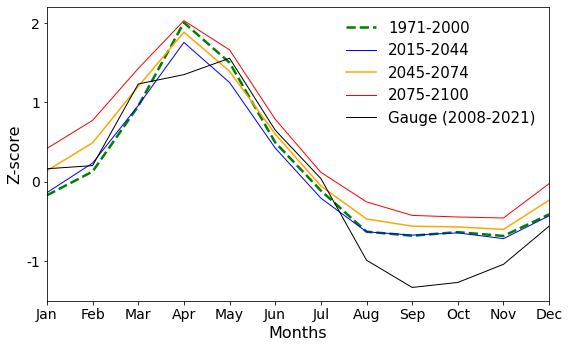

In [67]:

tickFontSize = 14
textFontSize = 16
legendFontSize = 15
titleFontSize = 16

linewidth = 0.8
dashLinewidth = 0.7

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

fig=plt.figure(figsize=(9, 6))

zScoreStr = ['-2', '-1', '0', '1', '2', '3']

plt.plot(range(nMonsPerYr), disch_monClim_refPeriod_zScore_ensMean_MissiVicks, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
plt.plot(range(nMonsPerYr), disch_monClim_eraOne_zScore_ensMean_MissiVicks, label="2015-2044", color = 'blue', linewidth=1)
plt.plot(range(nMonsPerYr), disch_monClim_eraTwo_zScore_ensMean_MissiVicks, label="2045-2074", color = 'orange', linewidth=1.5)
plt.plot(range(nMonsPerYr), disch_monClim_eraThree_zScore_ensMean_MissiVicks, label="2075-2100", color = 'red', linewidth=1)
plt.plot(range(nMonsPerYr), dischObsMonClim_zScore_MissiVicks, label="Gauge (2008-2021)", color = 'black', linewidth=1, marker='')


plt.gca().set_xticks(range(nMonsPerYr))
plt.gca().set_xticklabels(monsStr, minor=False, fontsize = tickFontSize)

plt.gca().set_yticks([-2, -1, 0, 1, 2, 3])
plt.gca().set_yticklabels(zScoreStr, minor=False, fontsize = tickFontSize)

plt.xlabel('Months', fontsize = textFontSize)
plt.ylabel('Z-score', fontsize = textFontSize)

plt.legend(frameon=False, fontsize=legendFontSize)

plt.xlim([0, 11])
plt.ylim([-1.5, 2.2])

plt.subplots_adjust(hspace=0.25, bottom=0.2)
plt.show()


## Printing the Z-scores for Mississippi at Vicksburg

In [68]:
print(disch_monClim_refPeriod_zScore_ensMean_MissiVicks)
print('')
print(disch_monClim_eraOne_zScore_ensMean_MissiVicks)
print('')
print(disch_monClim_eraTwo_zScore_ensMean_MissiVicks)
print('')
print(disch_monClim_eraThree_zScore_ensMean_MissiVicks)
print('')
print(dischObsMonClim_zScore_MissiVicks)


[-0.17126563  0.12839955  0.95330679  2.00459357  1.49956369  0.49430398
 -0.11194807 -0.62959579 -0.68047199 -0.63507738 -0.68341929 -0.41086595]

[-0.13743676  0.23513175  0.95972043  1.75450126  1.24903013  0.42418058
 -0.20653489 -0.63116551 -0.67267335 -0.6445909  -0.71695213 -0.42949259]

[ 0.13885333  0.49006441  1.20119488  1.88369985  1.39123124  0.60011316
 -0.05404907 -0.46899472 -0.55990824 -0.56953324 -0.60054203 -0.23284307]

[ 0.41904577  0.7728053   1.42609333  2.02859526  1.66022882  0.78672023
  0.11827141 -0.25384913 -0.42427724 -0.44446095 -0.45683601 -0.02344892]

[ 0.16326367  0.20255268  1.23103976  1.34858157  1.55513909  0.6491667
  0.03961698 -0.98892656 -1.33172888 -1.26876706 -1.04037864 -0.55955933]


In [69]:
STOP here ===========

SyntaxError: invalid syntax (<ipython-input-69-665768e7338e>, line 1)